In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

plt.style.use('seaborn')
%matplotlib inline

## Compra

In [2]:
compra = pd.read_csv('data/1_Orden_compra.csv', sep=';')
compra.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778.761
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321.208


In [3]:
compra.shape

(7295, 11)

## Productos

In [98]:
productos = pd.read_csv('data/2_Orden_productos.csv', sep=';')
productos.head()

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1,1.000,UN


Aquellos productos que se pesan, se contabilizan como 1. Además se remueven outliers y se transforma todo a numerico

In [99]:
productos['cantidad_aj'] = np.where(productos['buy_unit']=='KG' , 1, productos['quantity'])

productos['cantidad_aj'] = pd.to_numeric(productos['cantidad_aj']).value_counts()

productos['cantidad_aj'] = np.where(np.isnan(productos['cantidad_aj']), 1, productos['cantidad_aj'])

productos['cantidad_aj'] = np.where(productos['cantidad_aj']> 120, 1, productos['cantidad_aj'])

Se separa entre tipo de productos: Aquellos que se pesan y aquellos que no, además de poner la cantidad total

In [100]:
tipo = pd.get_dummies(productos['buy_unit'])

In [101]:
productos['sin_pesar'] = tipo['UN']
productos['pesados'] = tipo ['KG']
productos['cantidad_total'] = productos['sin_pesar'] + productos['pesados']
productos.drop(columns='quantity_found', inplace=True)


In [102]:
productos_agrupados = productos.groupby(by='order_id').sum().reset_index()

## Recolector

In [103]:
recolector = pd.read_csv('data/3_Recolector.csv', sep=';')
recolector.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


In [104]:
recolector.shape

(600, 6)

## Tiendas

In [105]:
tienda = pd.read_csv('data/4_tienda.csv', sep=';')
tienda.head()

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,1.824.774.341.566.610,-10.040.355.771.938.600
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203.111.495.565.700,-10.029.771.361.550.100


In [106]:
tienda.shape

(113, 4)

## Consolidacion

In [107]:
#Consolidación de los df compra y prodructos
df = pd.merge(compra, productos_agrupados, how='left', on='order_id')

In [108]:
#se cambia el nombre de la columna del df recolector
recolector.rename(columns={'shopper_id':'picker_id'}, inplace=True)
#Consolidación del df con recolector
df = pd.merge(df, recolector, how='left', on='picker_id')

In [109]:
#consolidación de todos los dataset
df = pd.merge(df, tienda, how='left', on='store_branch_id')

In [110]:
df.shape

(7295, 23)

In [111]:
df.to_csv('data/consolidado.csv', header=True, index=False)

In [112]:
df.head()

,order_id,lat_x,lng_x,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,...,pesados,cantidad_total,seniority,found_rate,picking_speed,accepted_rate,rating,store,lat_y,lng_y
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,10.0,27.0,ADVANCED,0.8564,1.56,1.00,4.68,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,...,15.0,103.0,ADVANCED,0.8516,1.14,1.00,4.76,387d4a5b65cf4bf00ad805c4b00eed01,18.163.960.871.027.900,-10.032.899.405.911.000
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,...,0.0,6.0,INTERMEDIATE,0.8337,2.03,1.00,4.96,0fae7b61265bc7ca4ce4d81440b62501,1.824.565.541.228.880,-1.003.324.934.760.470
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,...,5.0,17.0,INTERMEDIATE,0.8571,2.06,0.92,4.92,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,...,16.0,44.0,ADVANCED,0.8625,1.89,1.00,4.92,452ae015bf846e1d2932b7ea15720d64,1.823.159.108.764.060,-10.031.450.001.698.800


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7295 entries, 0 to 7294
Data columns (total 23 columns):
order_id           7295 non-null object
lat_x              7295 non-null object
lng_x              7295 non-null object
dow                7295 non-null int64
promised_time      7295 non-null object
actual_time        7295 non-null object
on_demand          7295 non-null bool
picker_id          7295 non-null object
driver_id          7295 non-null object
store_branch_id    7295 non-null object
total_minutes      6543 non-null object
cantidad_aj        7278 non-null float64
sin_pesar          7278 non-null float64
pesados            7278 non-null float64
cantidad_total     7278 non-null float64
seniority          7295 non-null object
found_rate         7212 non-null float64
picking_speed      7295 non-null float64
accepted_rate      7289 non-null float64
rating             7218 non-null float64
store              7295 non-null object
lat_y              7295 non-null object
lng_y   

In [114]:
df.isnull().any()

order_id           False
lat_x              False
lng_x              False
dow                False
promised_time      False
actual_time        False
on_demand          False
picker_id          False
driver_id          False
store_branch_id    False
total_minutes       True
cantidad_aj         True
sin_pesar           True
pesados             True
cantidad_total      True
seniority          False
found_rate          True
picking_speed      False
accepted_rate       True
rating              True
store              False
lat_y              False
lng_y              False
dtype: bool

In [115]:
#Reemplazo los nan
df.replace('nan', np.nan, inplace=True)

In [116]:
df.isnull().any()

order_id           False
lat_x              False
lng_x              False
dow                False
promised_time      False
actual_time        False
on_demand          False
picker_id          False
driver_id          False
store_branch_id    False
total_minutes       True
cantidad_aj         True
sin_pesar           True
pesados             True
cantidad_total      True
seniority          False
found_rate          True
picking_speed      False
accepted_rate       True
rating              True
store              False
lat_y              False
lng_y              False
dtype: bool

In [117]:
df.dropna(inplace=True)
df.isnull().any()

order_id           False
lat_x              False
lng_x              False
dow                False
promised_time      False
actual_time        False
on_demand          False
picker_id          False
driver_id          False
store_branch_id    False
total_minutes      False
cantidad_aj        False
sin_pesar          False
pesados            False
cantidad_total     False
seniority          False
found_rate         False
picking_speed      False
accepted_rate      False
rating             False
store              False
lat_y              False
lng_y              False
dtype: bool

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 7293
Data columns (total 23 columns):
order_id           6435 non-null object
lat_x              6435 non-null object
lng_x              6435 non-null object
dow                6435 non-null int64
promised_time      6435 non-null object
actual_time        6435 non-null object
on_demand          6435 non-null bool
picker_id          6435 non-null object
driver_id          6435 non-null object
store_branch_id    6435 non-null object
total_minutes      6435 non-null object
cantidad_aj        6435 non-null float64
sin_pesar          6435 non-null float64
pesados            6435 non-null float64
cantidad_total     6435 non-null float64
seniority          6435 non-null object
found_rate         6435 non-null float64
picking_speed      6435 non-null float64
accepted_rate      6435 non-null float64
rating             6435 non-null float64
store              6435 non-null object
lat_y              6435 non-null object
lng_y   

## Análisis descriptivo cantidad de productos por orden

In [119]:
df_grafico = df.copy()
df_grafico['pesaje'] = np.where(df_grafico['pesados']>=1, 1, 0)

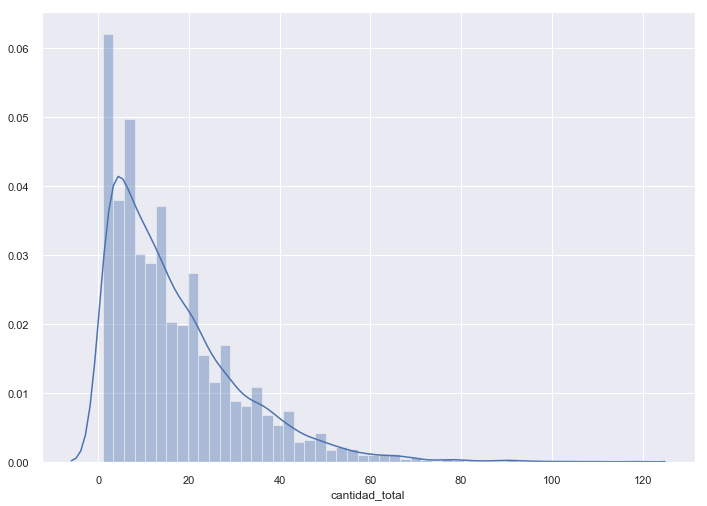

In [120]:
sns.distplot(df_grafico['cantidad_total'])

In [121]:
df_grafico['cantidad_total'].mean()

16.775757575757577

La mayor cantidad de compras son de cantidades bajas de productos, con un promedio de 16.7 productos por pedido

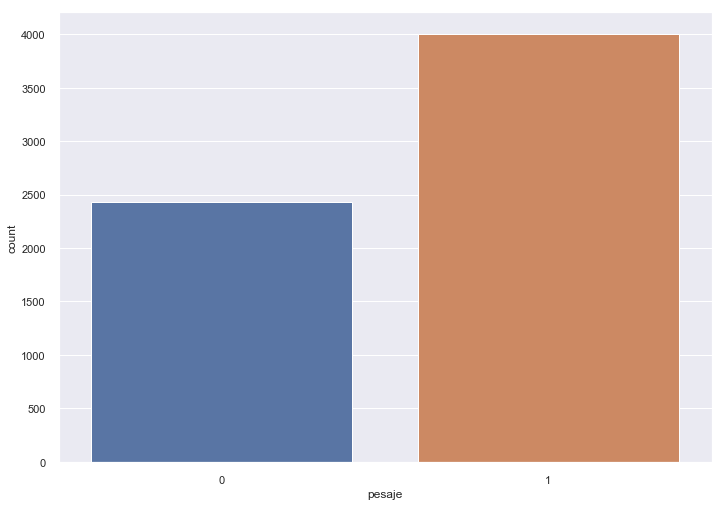

In [122]:
sns.countplot(data=df_grafico, x='pesaje')

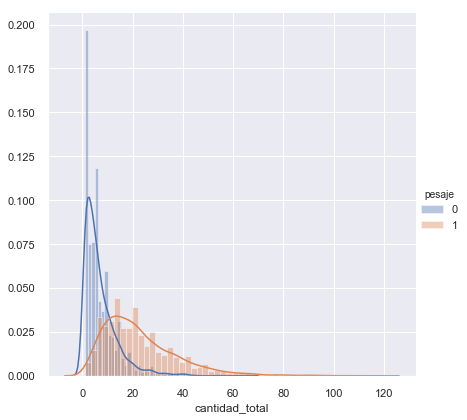

In [123]:
plt.rcParams['figure.figsize'] = 11.7,8.27
g = sns.FacetGrid(df_grafico, hue="pesaje",height= 6 )
g = g.map(sns.distplot, "cantidad_total")
g.add_legend()

In [124]:
print("Promedio de productos en ordenes sin productos que deban ser pesados = " +str(df_grafico.query("pesaje==0")['cantidad_total'].mean()))
print("Promedio de productos en ordenes con productos que deban ser pesados = " +str(df_grafico.query("pesaje==1")['cantidad_total'].mean()))



Promedio de productos en ordenes sin productos que deban ser pesados = 7.0930041152263374
Promedio de productos en ordenes con productos que deban ser pesados = 22.650686641697877


El gráfico ademas nos muestra que aquellas compras que tienen productos que se deben pesar, tienen una distribución diferente a aquellos en los que no se pide ningun producto de pesaje, siendo su promedio mayor en aquellos que deben ser pesados

### Relacion con el tiempo de entrega

In [125]:
df_grafico['tiempo_ajustado'] = pd.to_numeric(df.total_minutes.str.replace('.',''))/1000000

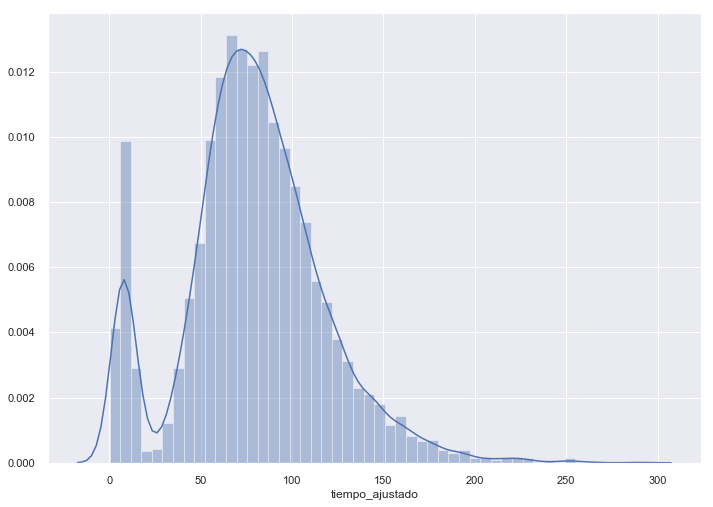

In [126]:
sns.distplot(df_grafico.tiempo_ajustado)

Es necesario revisar ese peak en los valores más bajos, ya que se puede deber a una mala codificación

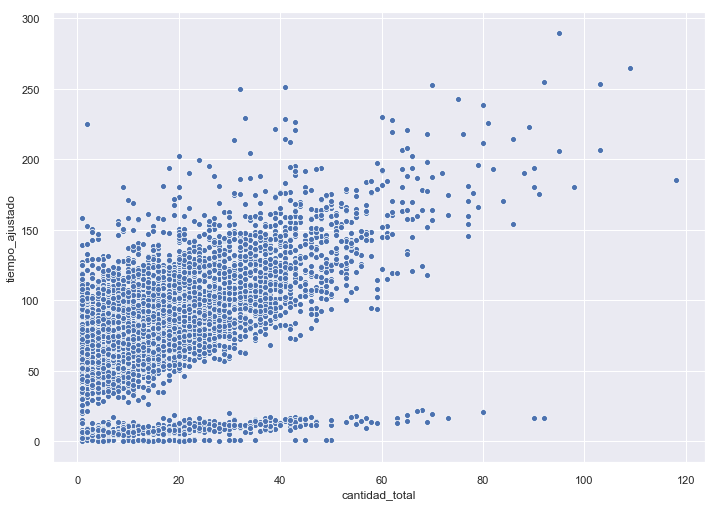

In [129]:
sns.scatterplot(data=df_grafico, x='cantidad_total', y='tiempo_ajustado')

El gráfico muestra evidencia para apoyar nuestra hipótesis, ya que se ve una correlación positiva entre la cantidad total de productos con el tiempo de entrega.

## Rating repartidor

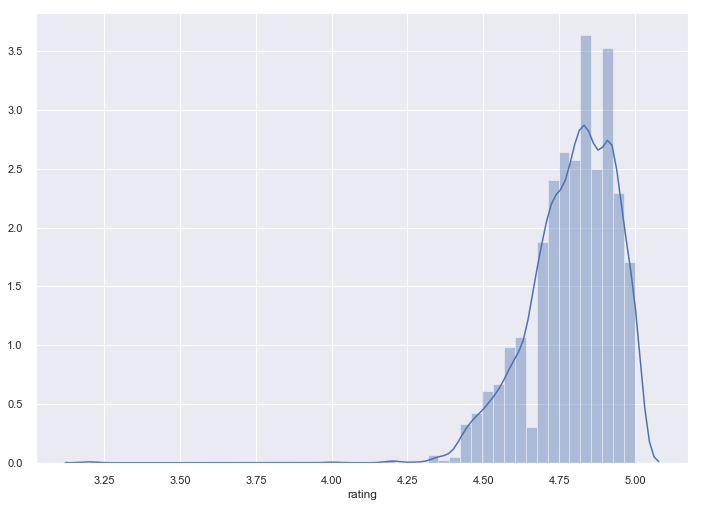

In [132]:
sns.distplot(df_grafico.rating)

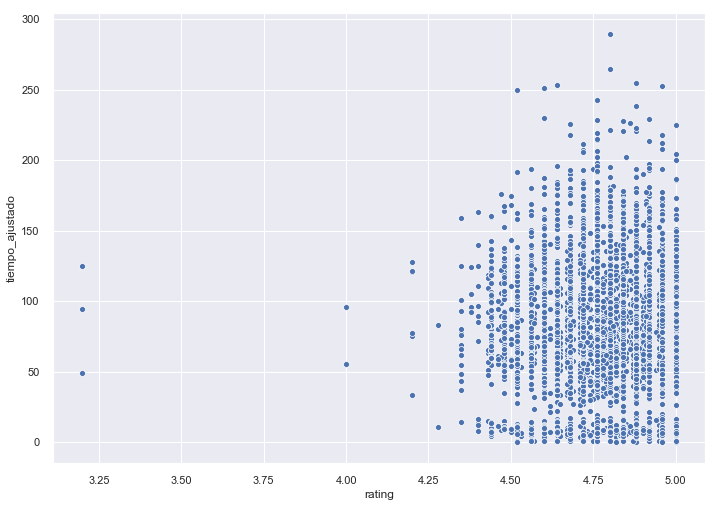

In [131]:
sns.scatterplot(data=df_grafico, x='rating', y='tiempo_ajustado')

En el caso del "Rating" del repartidor, de momento el gráfico no nos permite saber si es influyente en el tiempo de entrega, sobre todo por el hecho de que la distribución de las calificaciones es muy acotada entre 4.50 y 5

## Hora / Dia de la semana